# Algorithm Analysis
Read the results of various algorithms with feature aggregation, extract information from different aspects, analyze the results and plot the analysis.  
Results come from src/STAT/xpr_*.csv

In [42]:
ALGORITHMS = ['BLS', 'VFBLS', 'LightGBM', 'XGBoost', 'CatBoost', 'GRU_5', 'GRU_10', 'GRU_20', 'LSTM_5', 'LSTM_10', 'LSTM_20']

## 1. Generate average metrics table Like this
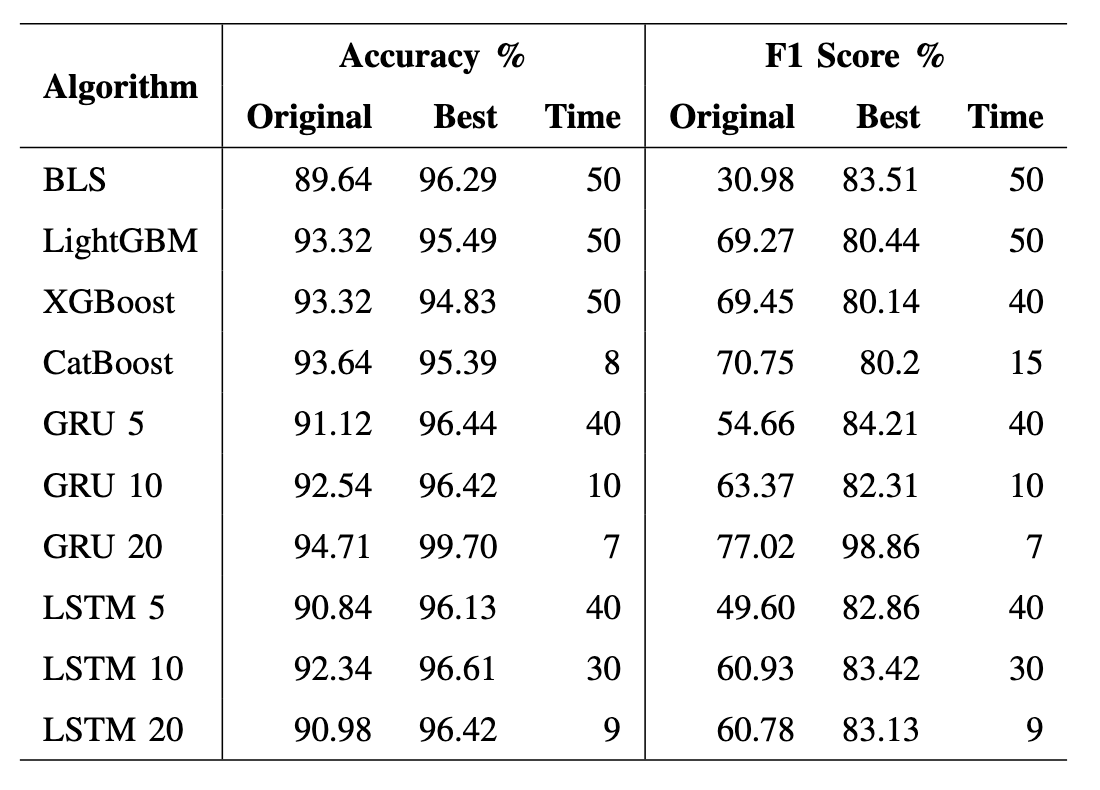

In [43]:
import pandas as pd
import re

metrics = []

for algorithm in ALGORITHMS:
    df = pd.read_csv(f"src/STAT/xpr_{algorithm}.csv")
    # Get average metrics
    df_average = df[df['Test datasets'] == 'Average']
    # Slice the columns
    df_average = df_average[['Time span', 'Accuracy %', 'Fscore %']]
    # Find original metrics
    original_accuracy = df_average[df_average['Time span'] == 0]['Accuracy %'].values[0]
    original_fscore = df_average[(df_average['Time span'] == 0)]['Fscore %'].values[0]
    # Find the bset Accuracy and Time span
    row_max = df_average.loc[df_average['Accuracy %'].idxmax()]
    best_accuracy = row_max['Accuracy %']
    best_accuracy_time_span = int(row_max['Time span'])
    # Find the bset Fscore and Time span
    row_max = df_average.loc[df_average['Fscore %'].idxmax()]
    best_fscore = row_max['Fscore %']
    best_fscore_time_span = int(row_max['Time span'])
    metrics.append([algorithm, original_accuracy, best_accuracy, best_accuracy_time_span, original_fscore, best_fscore, best_fscore_time_span])

#Generate the data body of a table for LaTeX.
for metric in metrics:
    algo_name = re.sub(r"_(\d+)", r"$_{\1}$", metric[0])
    print(f"{algo_name} & {metric[1]:.2f} & {metric[2]:.2f} & {metric[3]} & {metric[4]:.2f} & {metric[5]:.2f} & {metric[6]} \\\\")




BLS & 89.64 & 96.25 & 50 & 30.98 & 83.21 & 40 \\
VFBLS & 92.60 & 95.96 & 60 & 59.62 & 83.02 & 60 \\
LightGBM & 93.32 & 95.12 & 7 & 69.27 & 77.92 & 7 \\
XGBoost & 93.32 & 95.42 & 40 & 69.45 & 79.47 & 9 \\
CatBoost & 93.64 & 95.38 & 9 & 70.75 & 79.88 & 9 \\
GRU$_{5}$ & 91.12 & 96.68 & 50 & 54.66 & 84.74 & 50 \\
GRU$_{10}$ & 91.85 & 96.20 & 20 & 58.26 & 82.56 & 20 \\
GRU$_{20}$ & 91.13 & 96.83 & 30 & 60.84 & 81.09 & 30 \\
LSTM$_{5}$ & 91.22 & 96.25 & 50 & 52.49 & 83.02 & 50 \\
LSTM$_{10}$ & 92.05 & 96.88 & 30 & 62.50 & 84.49 & 30 \\
LSTM$_{20}$ & 92.87 & 96.18 & 9 & 67.65 & 82.03 & 9 \\


## Plot the metrics
Input parameter: metrics

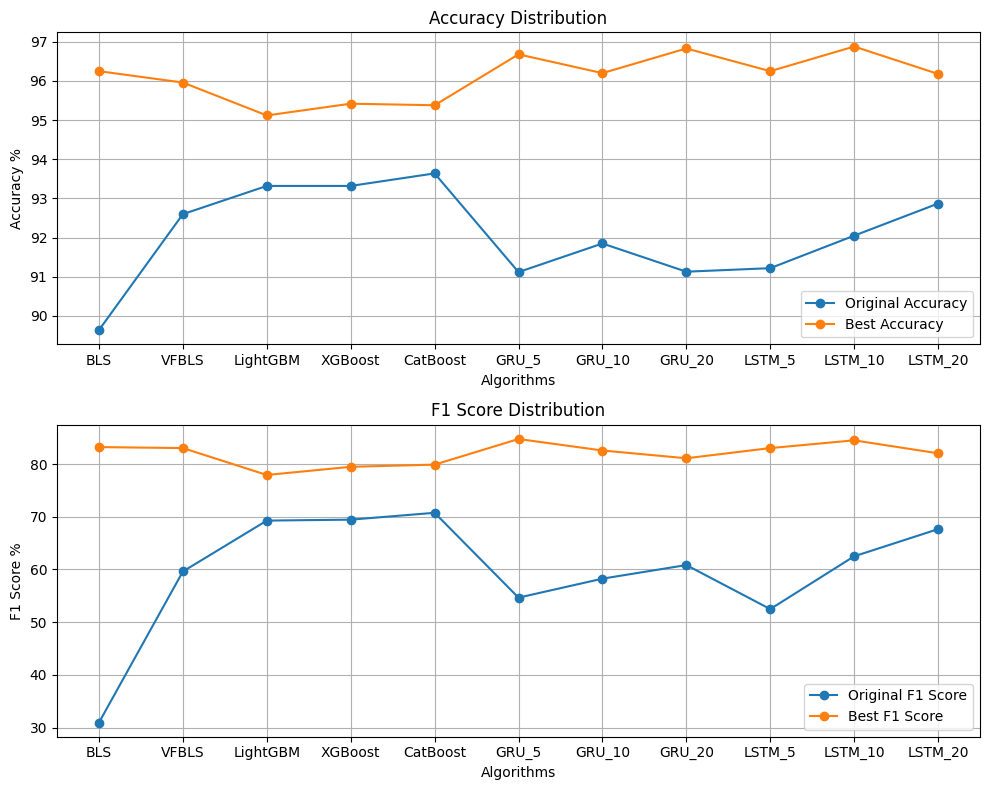

In [44]:
# Plot the array metrics with two subplots. One is for accuracy and the other is for fscore.
# In each subplot, there are two series. One is for original metrics and the other is for best metrics.
# The x-axis is the algorithms and the y-axis is the metrics.
# The plot should be a line plot.

## Plot the metrics
import matplotlib.pyplot as plt
import numpy as np

# Convert the metrics list to a NumPy array
metrics = np.array(metrics)

# Extract data for plotting
algorithms = metrics[:, 0]
original_accuracy = metrics[:, 1].astype(float)
best_accuracy = metrics[:, 2].astype(float)
original_fscore = metrics[:, 4].astype(float)
best_fscore = metrics[:, 5].astype(float)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot accuracy
ax1.plot(algorithms, original_accuracy, label='Original Accuracy', marker='o')
ax1.plot(algorithms, best_accuracy, label='Best Accuracy', marker='o')
ax1.set_title('Accuracy Distribution')
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy %')
ax1.legend()
ax1.grid(True)

# Plot FScore
ax2.plot(algorithms, original_fscore, label='Original F1 Score', marker='o')
ax2.plot(algorithms, best_fscore, label='Best F1 Score', marker='o')
ax2.set_title('F1 Score Distribution')
ax2.set_xlabel('Algorithms')
ax2.set_ylabel('F1 Score %')
ax2.legend()
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



In [45]:
## Generate a matrix for average metrics for all algorithms and plot it


/var/folders/qh/z1mj53y530n9ygqdxc1sy70m0000gn/T/ipykernel_8054/464513431.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  matrix = pd.concat([matrix, df_average], ignore_index=True)


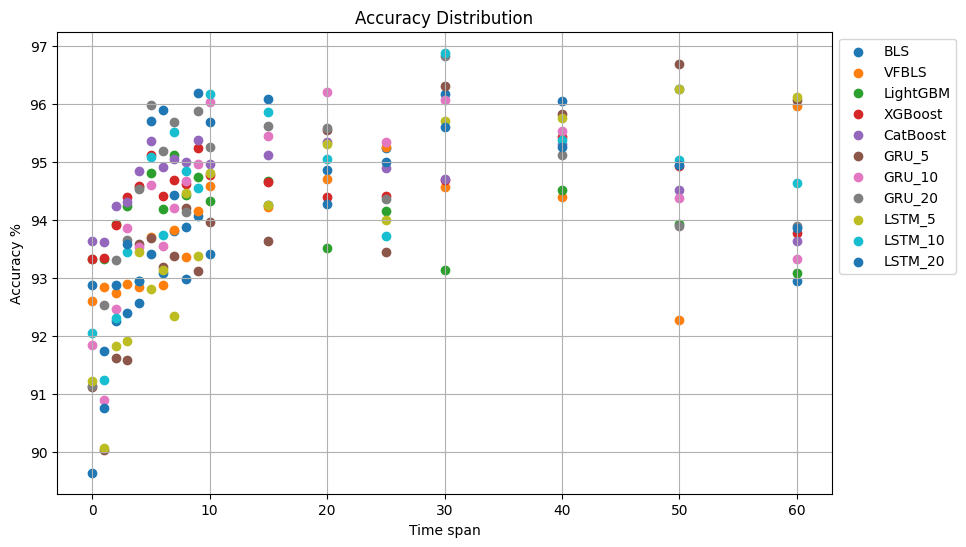

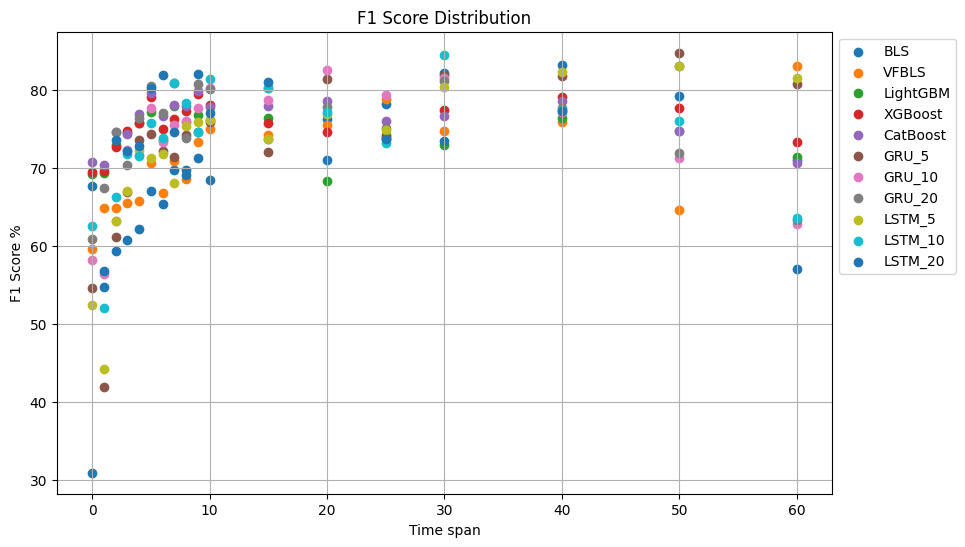

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

matrix = pd.DataFrame(columns=['Algorithm', 'Time span', 'Accuracy %', 'Fscore %'])

for algorithm in ALGORITHMS:
    df = pd.read_csv(f"src/STAT/xpr_{algorithm}.csv")
    # Get average metrics
    df_average = df[df['Test datasets'] == 'Average']
    # Slice the columns
    df_average = df_average[['Time span', 'Accuracy %', 'Fscore %']]
    # Add the algorithm column to the dataframe
    df_average['Algorithm'] = algorithm
    # Append the dataframe to the matrix dataframe
    matrix = pd.concat([matrix, df_average], ignore_index=True)

# Plot the matrix dataframe, using the 'Time span' as the x-axis, 'Accuracy %' as the y-axis, and 'Algorithm' as the series
fig, ax = plt.subplots(figsize=(10, 6))
for algorithm in ALGORITHMS:
    df = matrix[matrix['Algorithm'] == algorithm]
    ax.scatter(df['Time span'], df['Accuracy %'], label=algorithm, marker='o')
ax.set_title('Accuracy Distribution')
ax.set_xlabel('Time span')
ax.set_ylabel('Accuracy %')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
ax.grid(True)
plt.show()
# Plot the matrix dataframe, using the 'Time span' as the x-axis, 'Fscore %' as the y-axis, and 'Algorithm' as the series
fig, ax = plt.subplots(figsize=(10, 6))
for algorithm in ALGORITHMS:
    df = matrix[matrix['Algorithm'] == algorithm]
    ax.scatter(df['Time span'], df['Fscore %'], label=algorithm, marker='o')
ax.set_title('F1 Score Distribution')
ax.set_xlabel('Time span')
ax.set_ylabel('F1 Score %')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
ax.grid(True)
plt.show()





